## Homework №1

### Problem 1

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

### Свойство Винеровского процесса:
#### W_t - W_s ~ N(0, sigma^2(dt))
#### Тогда по свойству нормального распределения, приращение имеет распределение sigma * sqrt(dt) * N(0, 1)


In [76]:
def proccess(S0, T, N, mu, sigma):
    t = T / N
    dt = np.linspace(0, T, N)
    s = np.random.normal(0, 1, N)
    W_t = np.cumsum(s) * sigma * np.sqrt(t)
    W_t[0] = 0
    S_t = S0 * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * W_t)
    return S_t

In [77]:
sol = proccess(1, 200, 3650, 0.06, 0.2)

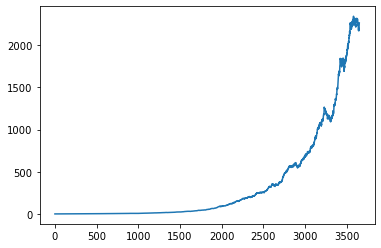

In [78]:
plt.plot(sol)

In [79]:
def cont_comp_returns(sol):
    R_t = np.diff(sol) / sol[:-1]
    r_t = np.log(1 + R_t)
    return r_t

In [80]:
ccr = cont_comp_returns(sol)
ccr

array([0.00286385, 0.00866906, 0.01380686, ..., 0.00690793, 0.00669873,
       0.00916571])

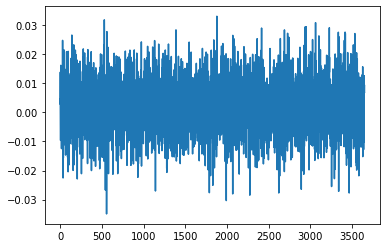

In [81]:
plt.plot(ccr)

In [82]:
print('Годовое среднее:', np.mean(ccr), 'Годовое стандартное отклонение:', np.std(ccr), sep='\n')

Годовое среднее:
0.0021171126283305508
Годовое стандартное отклонение:
0.009301232626150907


### Problem 2

In [83]:
time_series = pd.period_range(start='1950.01.01', end='2021.12.31', freq='D')
share_price = proccess(1, 100, time_series.size, 0.06, 0.2)
daily_share_price = pd.Series(share_price, time_series)

<AxesSubplot:>

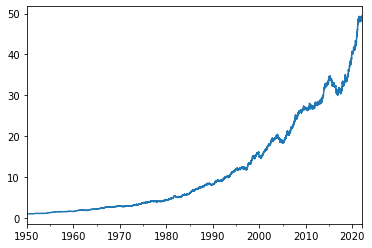

In [84]:
daily_share_price.plot()

Количество данных 864


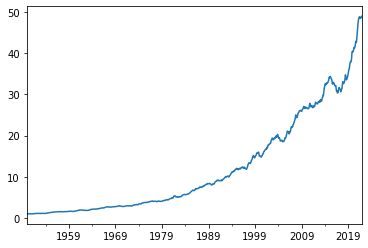

In [85]:
ts = daily_share_price
month_average = ts.resample('M').mean()
month_average.plot()
print('Количество данных', len(month_average))

### Problem 3

In [86]:
daily_ccr = cont_comp_returns(ts)

In [87]:
weekly_ccr = daily_ccr.resample('W').mean()

In [88]:
monthly_ccr = daily_ccr.resample('M').mean()

In [89]:
daily_ccr.describe()

count    26297.000000
mean         0.000148
std          0.002471
min         -0.010841
25%         -0.001522
50%          0.000160
75%          0.001816
max          0.010159
dtype: float64

In [90]:
weekly_ccr.describe()

count    3758.000000
mean        0.000147
std         0.000947
min        -0.004893
25%        -0.000487
50%         0.000157
75%         0.000783
max         0.003320
dtype: float64

In [91]:
monthly_ccr.describe()

count    864.000000
mean       0.000148
std        0.000455
min       -0.001837
25%       -0.000156
50%        0.000150
75%        0.000447
max        0.001565
dtype: float64

In [92]:
print('Годовое среднее ежедневное:', np.mean(daily_ccr), 'Стандартное отклонение ежедневное:', np.std(daily_ccr),
      sep='\n')

Годовое среднее ежедневное:
0.00014821448305457312
Стандартное отклонение ежедневное:
0.0024705947181332486


In [93]:
print('Годовое среднее еженедельное:', np.mean(weekly_ccr), 'Стандартное отклонение еженедельное:', np.std(weekly_ccr),
      sep='\n')

Годовое среднее еженедельное:
0.00014713222072622748
Стандартное отклонение еженедельное:
0.0009469047301326277


In [94]:
print('Годовое среднее ежемесячное:', np.mean(monthly_ccr), 'Стандартное отклонение ежемесячное:', np.std(monthly_ccr),
      sep='\n')

Годовое среднее ежемесячное:
0.00014821230590577673
Стандартное отклонение ежемесячное:
0.0004551767195593123


<AxesSubplot:>

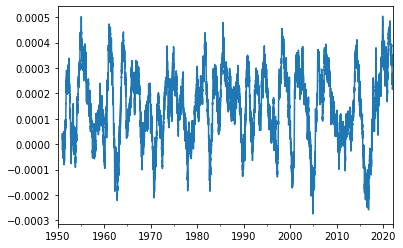

In [95]:
daily_ccr.rolling(365).apply(np.mean).plot()

<AxesSubplot:>

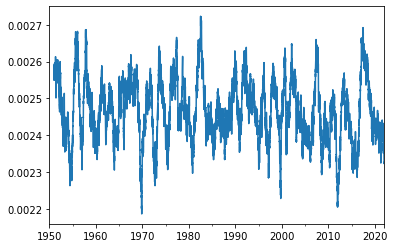

In [96]:
daily_ccr.rolling(365).apply(np.std).plot()

<AxesSubplot:>

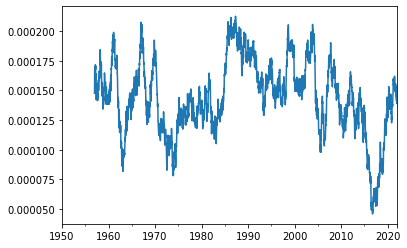

In [97]:
weekly_ccr.rolling(365).apply(np.mean).plot()

<AxesSubplot:>

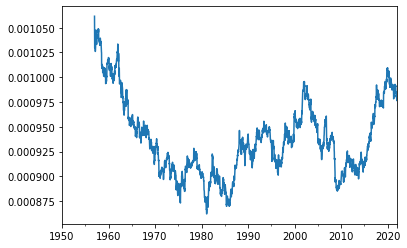

In [98]:
weekly_ccr.rolling(365).apply(np.std).plot()

<AxesSubplot:>

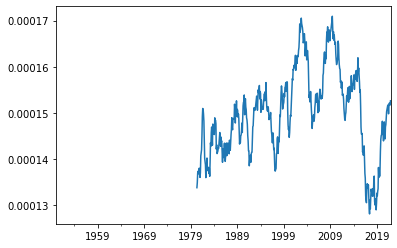

In [99]:
monthly_ccr.rolling(365).apply(np.mean).plot()

<AxesSubplot:>

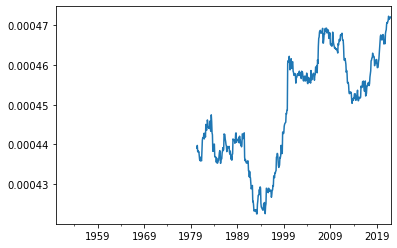

In [100]:
monthly_ccr.rolling(365).apply(np.std).plot()

### е) Как меняются среднее и стандартное отклонение с изменением размера окна?

### 1. Значения ряда начинают лежать в более узком интервале в зависимости от того, по каким значениям считаем средне (ежедневно - ежемесячное).
### 2. Более явно становятся видны тренды.

Среднее по дням: 0.00016115226012955631 Среднее по месяцам 0.0001606849854295596
Дисперсия по дням: 2.1675034739580118e-13 Дисперсия по месяцам 8.125164917232474e-15


<AxesSubplot:>

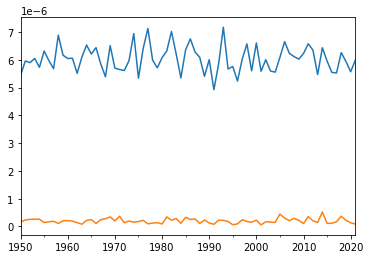

In [101]:
time_series = pd.period_range(start='1950.01.01', end='2021.12.31', freq='D')
share_price = proccess(1, 100, time_series.size, 0.06, 0.2)
ds = pd.Series(share_price, time_series)
#Daily simulated data
ds = cont_comp_returns(ds)
y_ds_m = ds.resample('Y').mean()
y_ds_d = ds.resample('Y').var()

daily_mean = np.mean(y_ds_m)
daily_var = np.var(y_ds_d)

#Monthly simulated data
mds = ds.resample('M').mean()
y_mds_m = mds.resample('Y').mean()
y_mds_d = mds.resample('Y').var()

month_mean = np.mean(y_mds_m)
month_var = np.var(y_mds_d)

print('Среднее по дням:', daily_mean, 'Среднее по месяцам', month_mean)
print('Дисперсия по дням:', daily_var, 'Дисперсия по месяцам', month_var)

y_ds_d.plot()
y_mds_d.plot()

### Среднее при расчете по дням и по месяцам совпадают
### В то же время дисперсии посчитаные аналогичным образом существенно различаются, примерно на 2 порядка

### Problem 4

In [102]:
def company_analysis(ticker, start, end):
    yahoo_financials = YahooFinancials(ticker)
    data = yahoo_financials.get_historical_price_data(start_date=start,
                                                      end_date=end,
                                                      time_interval='weekly')
    comp_df = pd.DataFrame(data[ticker]['prices'])
    time_series = pd.period_range(start=start, end=end, freq='W')
    ts = pd.Series(np.array(comp_df['close']), time_series)
    comp_ccr_w = cont_comp_returns(ts)
    comp_ccr_w.index = comp_ccr_w.index.astype('datetime64[ns]')

    comp_ccr_m = comp_ccr_w.resample('M').mean()
    comp_ccr_d = comp_ccr_w.resample('M').std()
    print(comp_ccr_w.describe(), comp_ccr_m.describe())

    comp_ccr_w_m = comp_ccr_w.resample('Y').mean()
    comp_ccr_w_d = comp_ccr_w.resample('Y').std()
    comp_ccr_m_m = comp_ccr_m.resample('Y').mean()
    comp_ccr_m_d = comp_ccr_m.resample('Y').std()

    mean_w_m = np.mean(comp_ccr_w_m)
    std_w_m = np.mean(comp_ccr_w_d)
    mean_m_m = np.mean(comp_ccr_m_m)
    std_m_m = np.mean(comp_ccr_m_d)
    print(mean_w_m, std_w_m, mean_m_m, std_m_m)

    ts_m = comp_ccr_w.rolling(365).apply(np.mean)
    ts_d = comp_ccr_w.rolling(365).apply(np.std)

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

    ts.plot(ax=axes[0, 0], title='price')
    comp_ccr_w.plot(ax=axes[0, 1], title='CCR')
    comp_ccr_m.plot(ax=axes[1, 0], title='CCR_M')
    comp_ccr_d.plot(ax=axes[1, 1], title='CCR_D')
    ts_m.plot(ax=axes[2, 0], title='roll_365_m')
    ts_d.plot(ax=axes[2, 1], title='roll_365_d')

count    1095.000000
mean        0.005856
std         0.047955
min        -0.278471
25%        -0.020959
50%         0.007706
75%         0.033687
max         0.236206
dtype: float64 count    252.000000
mean       0.005986
std        0.022503
min       -0.100730
25%       -0.007484
50%        0.005878
75%        0.019994
max        0.084283
dtype: float64
0.005859858995679965 0.04606696283347328 0.005985615470270181 0.0208343181984983


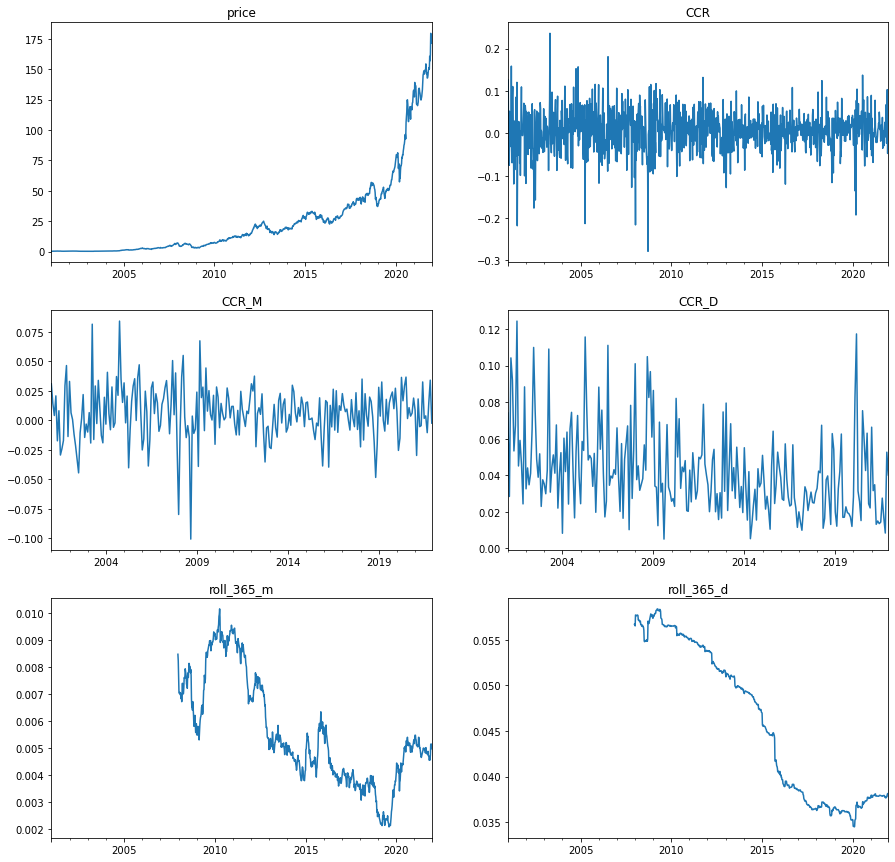

In [103]:
company_analysis('AAPL', '2001-01-01', '2021-12-31')

count    1095.000000
mean        0.001163
std         0.047516
min        -0.365644
25%        -0.022632
50%         0.003238
75%         0.025547
max         0.393197
dtype: float64 count    252.000000
mean       0.001224
std        0.021381
min       -0.121767
25%       -0.008494
50%        0.001392
75%        0.013129
max        0.099364
dtype: float64
0.0011740823991386322 0.042760813194009234 0.0012238373317607423 0.019587045781505656


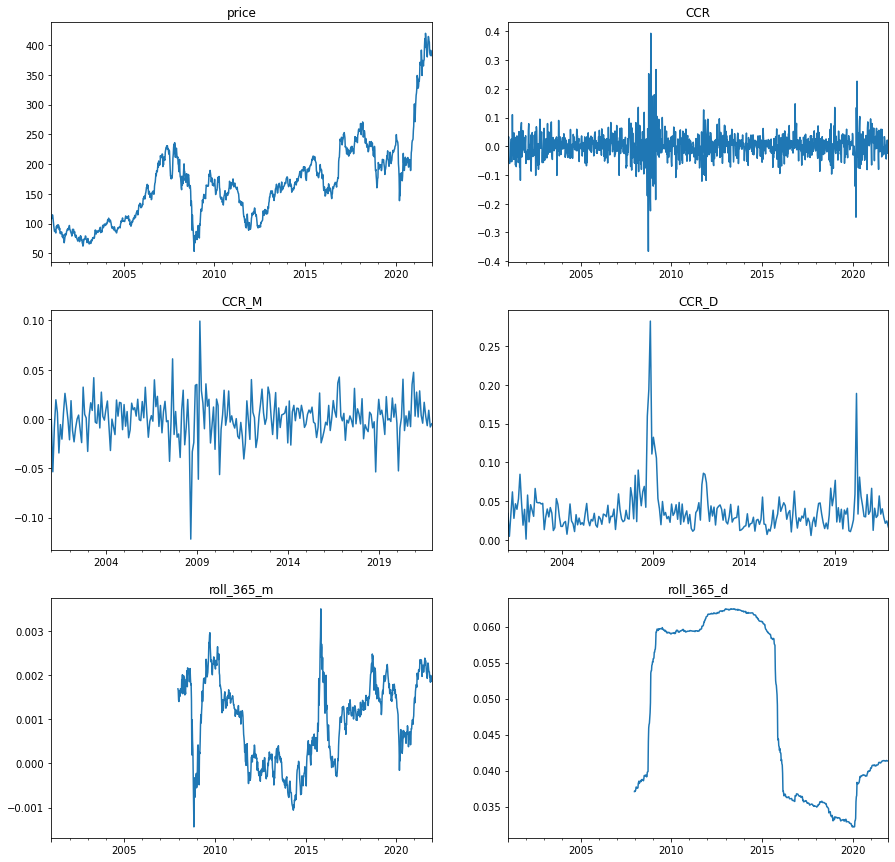

In [104]:
company_analysis('GS', '2001-01-01', '2021-12-31')

count    1095.000000
mean        0.002398
std         0.035754
min        -0.202276
25%        -0.016402
50%         0.002113
75%         0.021322
max         0.149357
dtype: float64 count    252.000000
mean       0.002344
std        0.015888
min       -0.063010
25%       -0.006235
50%        0.003533
75%        0.011280
max        0.050510
dtype: float64
0.002402378682151521 0.034235796436531137 0.0023444692213211603 0.014822844323807757


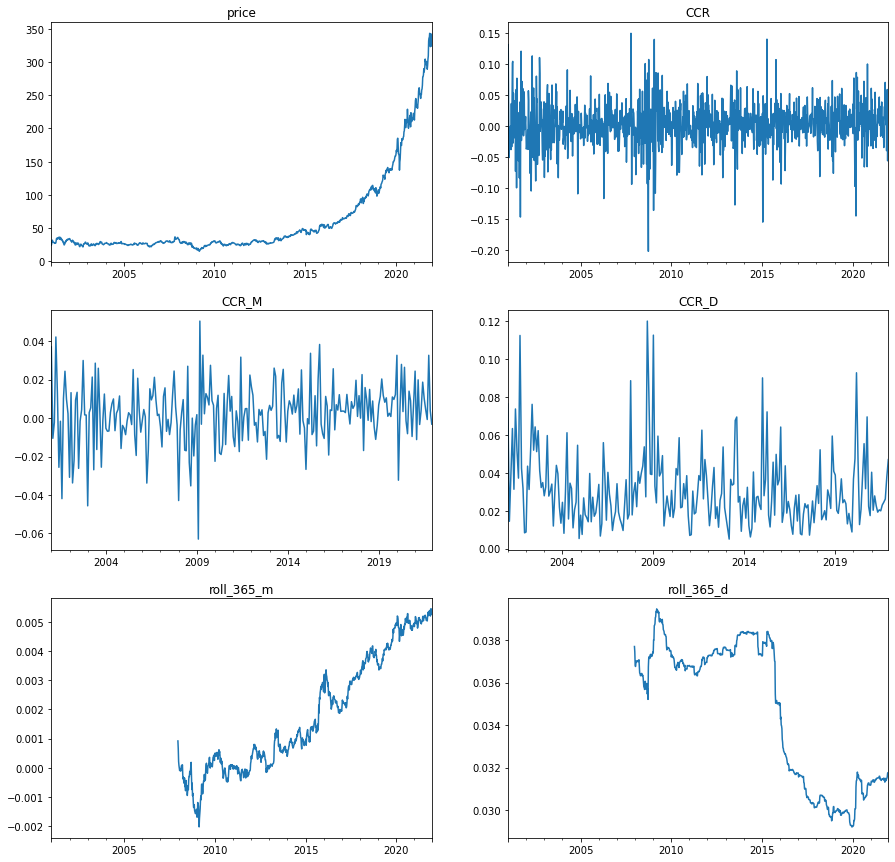

In [105]:
company_analysis('MSFT', '2001-01-01', '2021-12-31')

count    1095.000000
mean        0.001341
std         0.024102
min        -0.175977
25%        -0.010095
50%         0.001823
75%         0.014595
max         0.122933
dtype: float64 count    252.000000
mean       0.001328
std        0.009833
min       -0.041667
25%       -0.004232
50%        0.002246
75%        0.007120
max        0.023538
dtype: float64
0.0013448714568867863 0.022943292490150112 0.0013276323864350405 0.009527541529658843


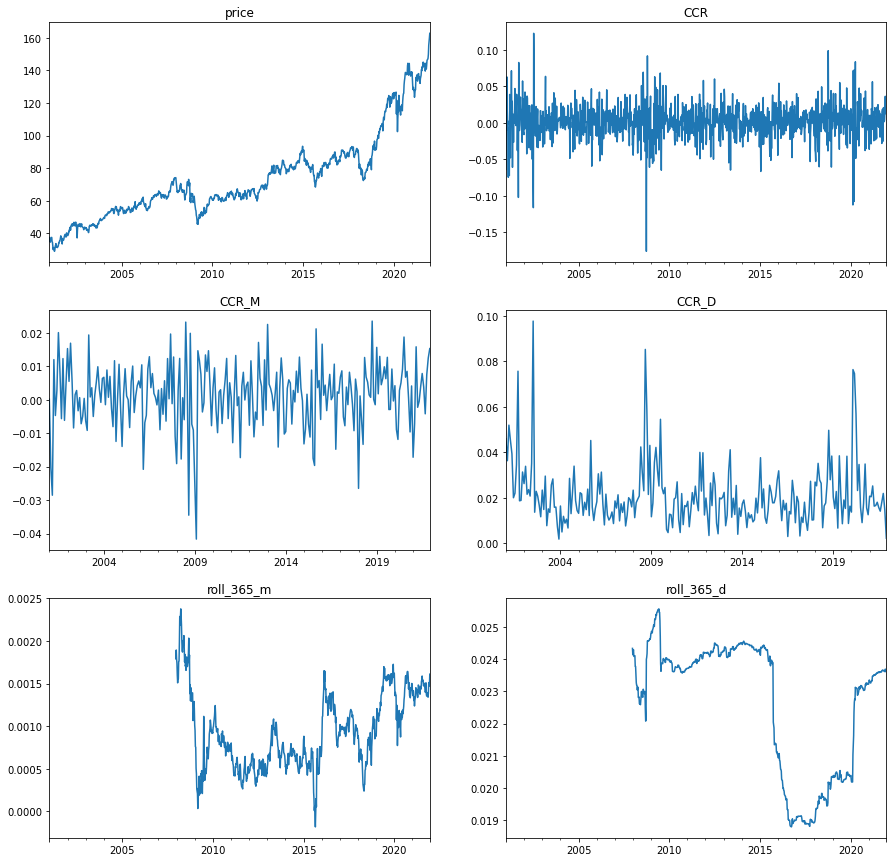

In [106]:
company_analysis('PG', '2001-01-01', '2021-12-31')

count    1095.000000
mean       -0.001229
std         0.044715
min        -0.228878
25%        -0.019636
50%        -0.000640
75%         0.019802
max         0.309399
dtype: float64 count    252.000000
mean      -0.001073
std        0.022761
min       -0.113125
25%       -0.011087
50%       -0.000600
75%        0.009585
max        0.094602
dtype: float64
-0.0012168230106468006 0.03972796837771902 -0.0010728752974452202 0.018695936518334018


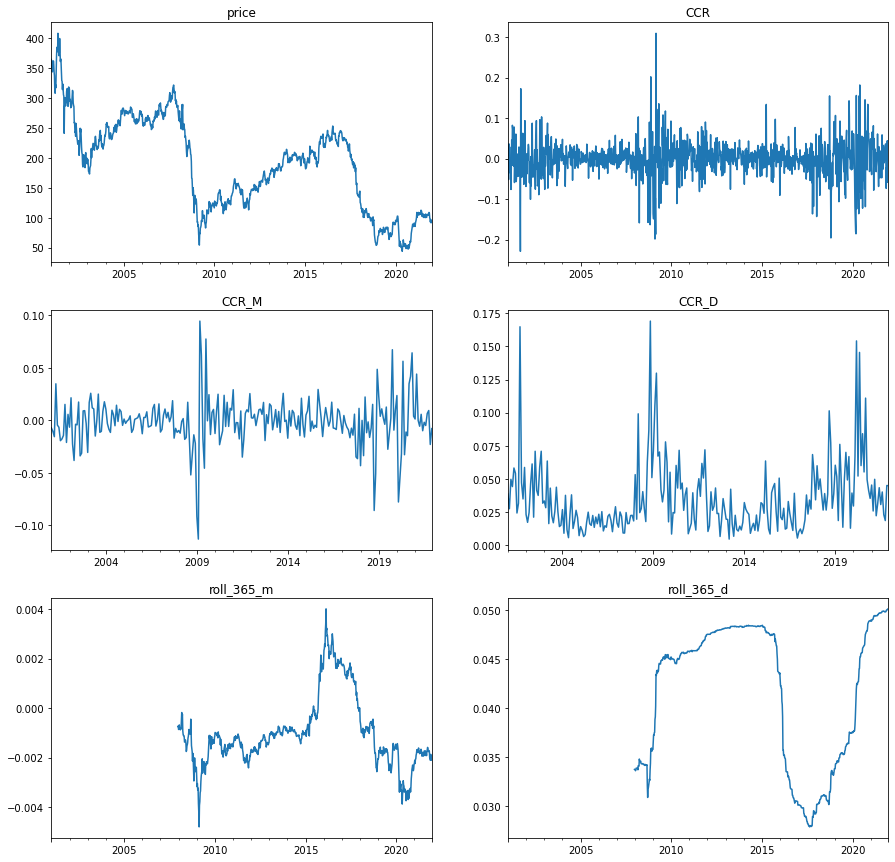

In [107]:
company_analysis('GE', '2001-01-01', '2021-12-31')

### Как вариации оценок среднего и стандартного отклонения соотносятся между частотами выборки? Как картина, которую вы наблюдаете, сравнивается с закономерностью, которую вы наблюдали на смоделированных данных? Если вы наблюдаете подобную закономерность, то почему? Если вы наблюдаете некоторые различия, что может быть причиной этого?

### 1. Cреднее при расчете по разным интервалам совпадают
### В то же время дисперсии посчитаные аналогичным образом существенно различаются
### 2. Графики дневной стоимости акций в целом похожи, за исключением кризисов, на фоне которых стоимости радикально изменялись. Иначе говоря, стоимости реальных бумаг более волатильны, чем смоделированные данные.
### 3. Графики continuously compounded returns тоже похожи. Однако интервал принимаемых значений реальных данных гораздо шире, чем у смоделированных. Самые большие разбросы приходятся на кризисы, которые в модели очевидно нельзя учесть.
### 4. Различие в данных вызвано тем, что модели могут изображать лишь приблеженную картину мира, не учитывая всех непредвиденных обстоятельств и событий

## Как меняются оценки по мере того, как мы проходим окно кризиса COVID? Наблюдаете ли вы другие кризисы через оценки?

### Очевидно, что в начале 2020 года показатели понижаются, это также заметно и во время кризиса ипотечного кредитования 2008 года.